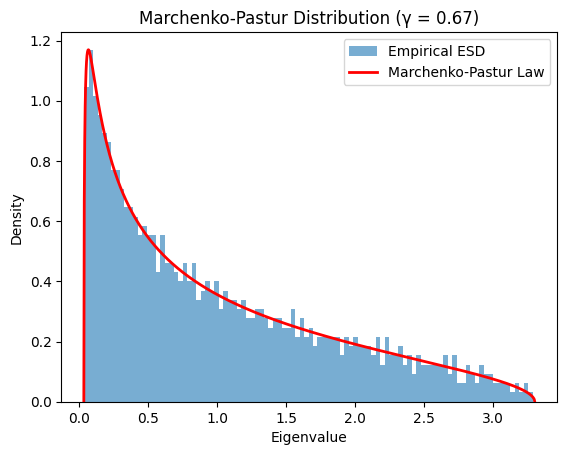

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parameters
n = 1000  # Rows
m = 1500  # Columns
gamma = n / m
sigma2 = 1

# Generate a random n x m matrix
X = np.random.randn(n, m) / np.sqrt(m)

# Compute the sample covariance matrix
S = X @ X.T  # Shape (n, n)

# Compute eigenvalues
eigenvalues = np.linalg.eigvalsh(S)

# Marchenko-Pastur theoretical density function
a = sigma2 * (1 - np.sqrt(gamma))**2
b = sigma2 * (1 + np.sqrt(gamma))**2
x = np.linspace(a, b, 1000)
mp_density = (1 / (2 * np.pi * gamma * sigma2)) * np.sqrt((b - x) * (x - a)) / x
mp_density = np.nan_to_num(mp_density)  # Remove NaN values

# Plot histogram and theoretical density
plt.hist(eigenvalues, bins=100, density=True, alpha=0.6, label="Empirical ESD")
plt.plot(x, mp_density, 'r-', lw=2, label="Marchenko-Pastur Law")
plt.xlabel("Eigenvalue")
plt.ylabel("Density")
plt.legend()
plt.title(f"Marchenko-Pastur Distribution (γ = {gamma:.2f})")
plt.show()
